In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Retrieve Human graded resources

In [2]:
file1_path = '../Data/56_files_pred_true_version3.csv'
result_df_file1 = pd.read_csv(file1_path)
# Rename columns
result_df_file1.rename(columns={'score': 'Real_Grade', 'long_description': 'Criteria'}, inplace=True)
result_df_file1

,user_id,Section,AI_Grade,AI_Comment,grader_id,attachment_url,section_id,Real_Grade,grader_comment,Criteria,grader_name
0,593636371,Project Description,6,The value 'PRAPARE' exists in the file. The va...,82762024,https://canvas.instructure.com/files/260325937...,_4258,1,I see a clear project description and purpose ...,Includes a brief description of the project.<b...,Kailey Love
1,593636371,Project Overview,3,The 'Problem Summary:' attribute includes a de...,82762024,https://canvas.instructure.com/files/260325937...,_4499,1,I see a detailed problem summary with appropri...,Describes problem or performance gap with desc...,Kailey Love
2,593636371,Project Scope,2,The 'In Scope Project Objectives' attribute in...,82762024,https://canvas.instructure.com/files/260325937...,_5706,1,I see clear scope objectives and a clear scope...,Explains objectives that are in scope.<br/>\n<...,Kailey Love
3,593636371,Project Team,6,The value of the 'Team Lead:' attribute contai...,82762024,https://canvas.instructure.com/files/260325937...,_7464,1,All project roles are filled with individual n...,Identifies:<br/>\n<br/>\n1. Team Lead<br/>\n2....,Kailey Love
4,593636371,Timeline,2,The task list contains a comprehensive set of ...,82762024,https://canvas.instructure.com/files/260325937...,_3182,1,I see feasible and appropriate steps related t...,Lists each key task and planned completion dates.,Kailey Love
...,...,...,...,...,...,...,...,...,...,...,...
250,596799191,Project Description,6,The value 'Increase Percentage of Employees wi...,111796248,https://canvas.instructure.com/files/260612893...,_4258,1,I see aim/purpose statements for the project. ...,Includes a brief description of the project.<b...,Samantha Basch
251,596799191,Project Overview,3,The value of the 'Problem Summary:' attribute ...,111796248,https://canvas.instructure.com/files/260612893...,_4499,1,"I see details on problem summary, desired outc...",Describes problem or performance gap with desc...,Samantha Basch
252,596799191,Project Scope,1,The 'In Scope Project Objectives' attribute in...,111796248,https://canvas.instructure.com/files/260612893...,_5706,1,"I see in-scope and out-of-scope objectives, bu...",Explains objectives that are in scope.<br/>\n<...,Samantha Basch
253,596799191,Project Team,7,The value of the 'Team Lead:' attribute contai...,111796248,https://canvas.instructure.com/files/260612893...,_7464,1,All project roles are filled with individual n...,Identifies:<br/>\n<br/>\n1. Team Lead<br/>\n2....,Samantha Basch


In [3]:
# visualize_df = result_df[['user_id', 'Section', 'Criteria', 'AI_Grade', 'Real_Grade', 'grader_name']]
visualize_df_file1 = result_df_file1[['user_id', 'Section', 'Criteria', 'Real_Grade', 'grader_name']]
visualize_df_file1

,user_id,Section,Criteria,Real_Grade,grader_name
0,593636371,Project Description,Includes a brief description of the project.<b...,1,Kailey Love
1,593636371,Project Overview,Describes problem or performance gap with desc...,1,Kailey Love
2,593636371,Project Scope,Explains objectives that are in scope.<br/>\n<...,1,Kailey Love
3,593636371,Project Team,Identifies:<br/>\n<br/>\n1. Team Lead<br/>\n2....,1,Kailey Love
4,593636371,Timeline,Lists each key task and planned completion dates.,1,Kailey Love
...,...,...,...,...,...
250,596799191,Project Description,Includes a brief description of the project.<b...,1,Samantha Basch
251,596799191,Project Overview,Describes problem or performance gap with desc...,1,Samantha Basch
252,596799191,Project Scope,Explains objectives that are in scope.<br/>\n<...,1,Samantha Basch
253,596799191,Project Team,Identifies:<br/>\n<br/>\n1. Team Lead<br/>\n2....,1,Samantha Basch


## Retrieve LLM generated assessment result

In [4]:
file2_path = '../Documents/Results/Result_Scope.csv'
result_df_file2 = pd.read_csv(file2_path)
result_df_file2

,Unnamed: 0,user_id,AI_Grade,Comment,Section,Criteria
0,1,594615885,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
1,2,594615885,1,The statement explicitly excludes activities t...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
2,1,594665284,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
3,2,594665284,0,The statement about resource limitations and r...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
4,1,593818150,1,The 'In-Scope Project Objectives' clearly desc...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
...,...,...,...,...,...,...
107,2,593818149,1,The statement explicitly excludes activities t...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
108,1,594615886,1,The statement describes the main objectives of...,Project Scope,Question 1. Does the 'In Scope Project Objecti...
109,2,594615886,1,The statement explicitly excludes Specialty Cl...,Project Scope,Question 2. Does the 'Out of Scope Project Obj...
110,1,593772947,1,The statement describes the main objective of ...,Project Scope,Question 1. Does the 'In Scope Project Objecti...


## AI difference for pass and fail submissions

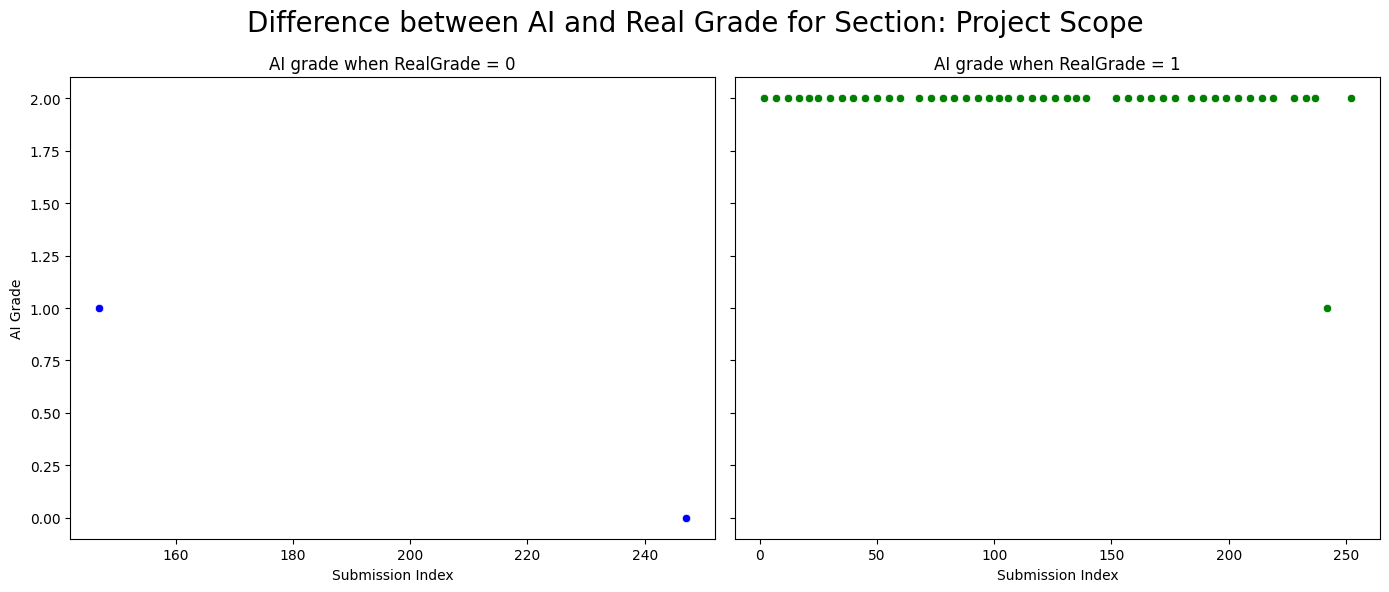

In [5]:
# 1. Load the data from existing DataFrames
df_real = visualize_df_file1[["user_id", "Section", "Real_Grade"]]
df_ai = result_df_file2[["user_id", "AI_Grade"]]

# 2. Aggregate AI_Grade by summing up values for each user_id
df_ai_sum = df_ai.groupby("user_id", as_index=False)["AI_Grade"].sum()

# 3. Merge the two dataframes on 'user_id'
# This ensures that only matching user_ids are considered
merged_df = pd.merge(df_real, df_ai_sum, on="user_id", how="inner")

# Function to visualize the difference between AI_Grade and Real_Grade
def visualize_difference_between_AI_and_Real_Grade(merged_df, section):
    """
    Visualize AI_Grade for submissions with Real_Grade = 0 and Real_Grade = 1
    using scatter plots for a given section.
    """
    # Filter the dataframe for the given section
    section_df = merged_df[merged_df['Section'] == section]

    # Separate the data into two subsets based on Real_Grade
    real_grade_0 = section_df[section_df['Real_Grade'] == 0]
    real_grade_1 = section_df[section_df['Real_Grade'] == 1]

    # Create a figure with two subplots for Real_Grade = 0 and Real_Grade = 1
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle(f'Difference between AI and Real Grade for Section: {section}', fontsize=20)

    # Scatter plot for Real_Grade = 0
    sns.scatterplot(ax=axes[0], x=real_grade_0.index, y=real_grade_0['AI_Grade'], color='blue')
    axes[0].set_title('AI grade when RealGrade = 0')
    axes[0].set_xlabel('Submission Index')
    axes[0].set_ylabel('AI Grade')

    # Scatter plot for Real_Grade = 1
    sns.scatterplot(ax=axes[1], x=real_grade_1.index, y=real_grade_1['AI_Grade'], color='green')
    axes[1].set_title('AI grade when RealGrade = 1')
    axes[1].set_xlabel('Submission Index')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Example: Run the visualization function for a specific section
visualize_difference_between_AI_and_Real_Grade(merged_df, "Project Scope")

## Confusion Matrix

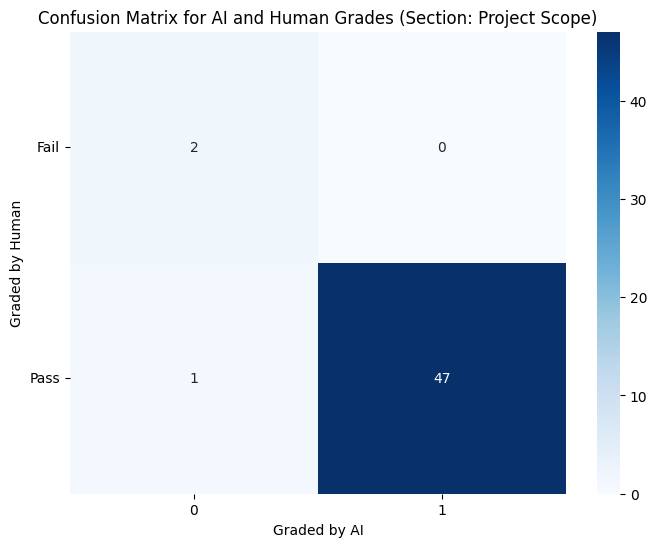

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. 데이터 준비: 두 DataFrame에서 필요한 컬럼만 로드
df_real = visualize_df_file1[["user_id", "Section", "Real_Grade"]]
df_ai = result_df_file2[["user_id", "AI_Grade"]]

# 2. AI_Grade를 user_id 단위로 합산
df_ai_sum = df_ai.groupby("user_id", as_index=False)["AI_Grade"].sum()

# 3. 두 데이터프레임 병합: user_id 기준으로 일치하는 항목만 선택
merged_df = pd.merge(df_real, df_ai_sum, on="user_id", how="inner")

# 4. AI Grade를 0 또는 1로 이진화
threshold = 2  # 예시: AI_Grade가 50 이상이면 Pass, 아니면 Fail로 설정
merged_df['AI_Pred'] = (merged_df['AI_Grade'] >= threshold).astype(int)

# 5. Confusion Matrix 생성 및 시각화 함수
def plot_confusion_matrix(merged_df, section):
    """
    Confusion Matrix를 생성하고 시각화하는 함수
    """
    # 섹션별 데이터 필터링
    section_df = merged_df[merged_df['Section'] == section]

    # 실제 Human Grade (Real_Grade)와 AI 예측 값 (AI_Pred)
    y_true = section_df['Real_Grade']
    y_pred = section_df['AI_Pred']

    # Confusion Matrix 계산
    cm = confusion_matrix(y_true, y_pred)

    # Confusion Matrix 시각화
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)
    ax.set_yticklabels(["Fail", "Pass"], rotation=0, ha="right")
    plt.xlabel('Graded by AI')
    plt.ylabel('Graded by Human')
    plt.title(f'Confusion Matrix for AI and Human Grades (Section: {section})')
    plt.show()

# Example: 특정 섹션에 대해 Confusion Matrix 시각화
plot_confusion_matrix(merged_df, "Project Scope")